In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import json
from pandas.io.json import json_normalize

%matplotlib inline

# set seed for reproducibility
np.random.seed(0) 

# read in all our data
tmdb_movies = pd.read_csv('tmdb_5000_movies.csv')


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#Xem 5 dòng dữ liệu đầu tiên
tmdb_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#Xem 5 dòng dữ liệu cuối cùng
tmdb_movies.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [5]:
#Xem số dòng, số cột của dataframe
tmdb_movies.shape

(4803, 20)

In [6]:
tmdb_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
tmdb_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
# Số lượng điểm data bị thiếu trên mỗi cột
missing_values_count = tmdb_movies.isnull().sum()

# Số lượng điểm data bị thiếu trên mỗi cột của 10 cột đầu
missing_values_count

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [9]:
# homepage bị thiếu data rất nhiều (3091/4803) nên sẽ xóa column này đi
tmdb_movies.drop(['homepage'], axis = 1, inplace = True)
tmdb_movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [10]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
tmdb_movies.fillna(method = 'bfill', axis=0).fillna(0)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name

In [11]:
# Số lượng điểm data bị thiếu trên mỗi cột
missing_values_count = tmdb_movies.isnull().sum()

# Số lượng điểm data bị thiếu trên mỗi cột của 10 cột đầu
missing_values_count

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title                     0
vote_average              0
vote_count                0
dtype: int64

In [12]:
#Do nhiều kiểu date formats nên dùng infer_datetime_format=True
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], infer_datetime_format=True)

## 1.  What areas have the most influence on revenue?

In [13]:
#Next, production_countries contains JSON data, so load it as a column of dicts
v = tmdb_movies.production_countries.apply(json.loads)

In [14]:
#Next, flatten your data using np.repeat
tmdb_movies_production_countries_revenue = pd.DataFrame(
{
    'id' : tmdb_movies['id'].values.repeat(v.str.len(), axis=0),
    'revenue': tmdb_movies['revenue'].values.repeat(v.str.len(), axis=0),
    'production_countries' : np.concatenate(v.tolist())
})

In [15]:
tmdb_movies_production_countries_revenue.shape

(6436, 3)

In [16]:
tmdb_movies_production_countries_revenue.head()

,id,production_countries,revenue
0,19995,"{'iso_3166_1': 'US', 'name': 'United States of...",2787965087
1,19995,"{'iso_3166_1': 'GB', 'name': 'United Kingdom'}",2787965087
2,285,"{'iso_3166_1': 'US', 'name': 'United States of...",961000000
3,206647,"{'iso_3166_1': 'GB', 'name': 'United Kingdom'}",880674609
4,206647,"{'iso_3166_1': 'US', 'name': 'United States of...",880674609


In [17]:
tmdb_movies_production_countries_revenue['production_countries'] = tmdb_movies_production_countries_revenue['production_countries'].map(lambda x: x.get('name'))

In [18]:
tmdb_movies_production_countries_revenue.head()

,id,production_countries,revenue
0,19995,United States of America,2787965087
1,19995,United Kingdom,2787965087
2,285,United States of America,961000000
3,206647,United Kingdom,880674609
4,206647,United States of America,880674609


In [19]:
tmdb_movies_production_countries_revenue.describe()

,id,revenue
count,6436.000000,6.436000e+03
mean,52864.037756,8.690092e+07
std,84522.625604,1.677519e+08
min,5.000000,0.000000e+00
25%,8197.750000,0.000000e+00
50%,13405.000000,2.323791e+07
75%,50738.750000,9.889521e+07
max,459488.000000,2.787965e+09


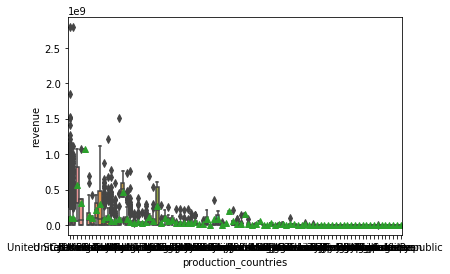

In [20]:
sns.boxplot(x=tmdb_movies_production_countries_revenue['production_countries'], y=tmdb_movies_production_countries_revenue['revenue'], showmeans=True)
plt.show()

In [21]:
df_agg = tmdb_movies_production_countries_revenue.groupby('production_countries').agg({'revenue': np.sum}) #aggregate

In [22]:
df_agg.sort_values(by=['revenue'], ascending = False).head()

,revenue
production_countries,
United States of America,380026795469
United Kingdom,60084988968
Germany,25480164585
Canada,14990315869
France,14187924310


#### Vùng United States of America có doanh số cao nhất là: 380026795469

## 2. How is a movie’s revenue and average score affected by its genre?

### a. How is a movie’s revenue affected by its genre?
#https://analyticsdefined.com/anova-test-part-1/

#### H0: Không có mối quan hệ nào giữa genre và movie's revenue. Mean giữa các genre là như nhau.
#### H1: Có mối quan hệ giữa genre và movie's revenue. 

In [23]:
#Next, genres contains JSON data, so load it as a column of dicts
v = tmdb_movies.genres.apply(json.loads)

In [24]:
#Next, flatten your data using np.repeat
tmdb_movies_genre_revenue = pd.DataFrame(
{
    'id' : tmdb_movies['id'].values.repeat(v.str.len(), axis=0),
    'revenue': tmdb_movies['revenue'].values.repeat(v.str.len(), axis=0),
    'genre' : np.concatenate(v.tolist())
})

In [25]:
#'revenue': tmdb_movies['revenue']
tmdb_movies_genre_revenue.shape

(12160, 3)

In [26]:
tmdb_movies_genre_revenue.head()

,genre,id,revenue
0,"{'id': 28, 'name': 'Action'}",19995,2787965087
1,"{'id': 12, 'name': 'Adventure'}",19995,2787965087
2,"{'id': 14, 'name': 'Fantasy'}",19995,2787965087
3,"{'id': 878, 'name': 'Science Fiction'}",19995,2787965087
4,"{'id': 12, 'name': 'Adventure'}",285,961000000


In [27]:
type(tmdb_movies_genre_revenue.genre)

pandas.core.series.Series

In [28]:
tmdb_movies_genre_revenue['genre'] = tmdb_movies_genre_revenue['genre'].map(lambda x: x.get('name'))

In [29]:
tmdb_movies_genre_revenue.head()

,genre,id,revenue
0,Action,19995,2787965087
1,Adventure,19995,2787965087
2,Fantasy,19995,2787965087
3,Science Fiction,19995,2787965087
4,Adventure,285,961000000


In [30]:
tmdb_movies_genre_revenue.describe()

,id,revenue
count,12160.000000,1.216000e+04
mean,50812.516694,9.539463e+07
std,82611.978353,1.794693e+08
min,5.000000,0.000000e+00
25%,8617.000000,0.000000e+00
50%,13497.000000,2.525656e+07
75%,49029.500000,1.072777e+08
max,459488.000000,2.787965e+09


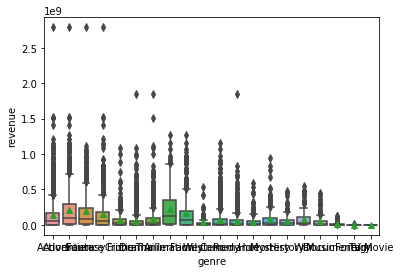

In [31]:
sns.boxplot(x=tmdb_movies_genre_revenue['genre'], y=tmdb_movies_genre_revenue['revenue'], showmeans=True)
plt.show()

In [32]:
#ANOVA F Test

model = smf.ols(formula='revenue ~ genre', data=tmdb_movies_genre_revenue)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     63.71
Date:                Wed, 11 Apr 2018   Prob (F-statistic):          4.65e-233
Time:                        11:27:29   Log-Likelihood:            -2.4778e+05
No. Observations:               12160   AIC:                         4.956e+05
Df Residuals:                   12140   BIC:                         4.958e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### F-statistic > Prob (63.71 > 4.65e-233) và P>|t| khá nhỏ nên H0 sẽ sai.
#### Có mối liên quan giữa genre và movie revenue

In [33]:
df_agg = tmdb_movies_genre_revenue.groupby('genre').agg({'revenue': np.sum}) #aggregate
df_agg.sort_values(by=['revenue'], ascending = False).head()

,revenue
genre,
Adventure,164841561551
Action,162959914515
Comedy,122760517608
Drama,119710983984
Thriller,103250426269


#### genre Adventure có doanh thu là cao nhất với 164841561551

### b. How is a movie’s average score affected by its genre?

#### H0: Không có mối quan hệ nào giữa genre và movie's score. Mean giữa các genre là như nhau.
#### H1: Có mối quan hệ giữa genre và movie's score. 

In [34]:
#Next, genres contains JSON data, so load it as a column of dicts
v = tmdb_movies.genres.apply(json.loads)

In [35]:
#Next, flatten your data using np.repeat
tmdb_movies_vote_revenue = pd.DataFrame(
{
    'id' : tmdb_movies['id'].values.repeat(v.str.len(), axis=0),
    'vote': tmdb_movies['vote_average'].values.repeat(v.str.len(), axis=0),
    'genre' : np.concatenate(v.tolist())
})

In [36]:
tmdb_movies_vote_revenue.shape

(12160, 3)

In [37]:
tmdb_movies_vote_revenue.head()

,genre,id,vote
0,"{'id': 28, 'name': 'Action'}",19995,7.2
1,"{'id': 12, 'name': 'Adventure'}",19995,7.2
2,"{'id': 14, 'name': 'Fantasy'}",19995,7.2
3,"{'id': 878, 'name': 'Science Fiction'}",19995,7.2
4,"{'id': 12, 'name': 'Adventure'}",285,6.9


In [38]:
tmdb_movies_vote_revenue['genre'] = tmdb_movies_vote_revenue['genre'].map(lambda x: x.get('name'))

In [39]:
tmdb_movies_vote_revenue.head()

,genre,id,vote
0,Action,19995,7.2
1,Adventure,19995,7.2
2,Fantasy,19995,7.2
3,Science Fiction,19995,7.2
4,Adventure,285,6.9


In [40]:
tmdb_movies_vote_revenue.describe()

,id,vote
count,12160.000000,12160.000000
mean,50812.516694,6.137426
std,82611.978353,1.060397
min,5.000000,0.000000
25%,8617.000000,5.600000
50%,13497.000000,6.200000
75%,49029.500000,6.800000
max,459488.000000,10.000000


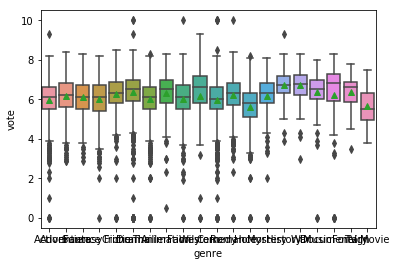

In [41]:
sns.boxplot(x=tmdb_movies_vote_revenue['genre'], y=tmdb_movies_vote_revenue['vote'], showmeans=True)
plt.show()

In [42]:
#ANOVA F Test

model = smf.ols(formula='vote ~ genre', data=tmdb_movies_vote_revenue)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     27.37
Date:                Wed, 11 Apr 2018   Prob (F-statistic):           5.47e-96
Time:                        11:27:30   Log-Likelihood:                -17712.
No. Observations:               12160   AIC:                         3.546e+04
Df Residuals:                   12140   BIC:                         3.561e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### F-statistic > Prob (27.37 > 5.47e-96) và P>|t| khá nhỏ nên H0 sẽ sai.
#### Có mối liên quan giữa genre và movie score

In [43]:
df_agg = tmdb_movies_vote_revenue.groupby('genre').agg({'vote': np.average}) #aggregate
df_agg.sort_values(by=['vote'], ascending = False).head()

,vote
genre,
History,6.719797
War,6.713889
Drama,6.388594
Music,6.355676
Foreign,6.352941


#### Genre History có score (vote) lớn nhất

## 3.  What influence does release date have on revenue?

In [44]:
tmdb_movies['day_of_week'] = tmdb_movies['release_date'].dt.weekday_name

In [45]:
tmdb_movies['day_of_week'].head()

0     Thursday
1     Saturday
2       Monday
3       Monday
4    Wednesday
Name: day_of_week, dtype: object

In [46]:
tmdb_movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,day_of_week
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Thursday
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Saturday
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Monday
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Monday
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Wednesday


In [47]:
model = smf.ols(formula='revenue ~ day_of_week', data=tmdb_movies)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     32.49
Date:                Wed, 11 Apr 2018   Prob (F-statistic):           1.44e-38
Time:                        11:27:31   Log-Likelihood:                -97516.
No. Observations:                4802   AIC:                         1.950e+05
Df Residuals:                    4795   BIC:                         1.951e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [48]:
df_agg = tmdb_movies.groupby('day_of_week').agg({'revenue': np.sum}) #aggregate
df_agg.sort_values(by=['revenue'], ascending = False).head()

,revenue
day_of_week,
Friday,110160856378
Wednesday,109396311023
Thursday,86050603354
Tuesday,41499181853
Monday,21051829591


#### Những Phim có release date vào ngày thứ 6 sẽ có doanh thu cao